# Kernel 2

so in this version I would like to try using facial landmark to filter the face to be use later in hearate mornitoring

In [1]:
import cv2
import numpy as np
import os
import glob

In [2]:
videos = glob.glob('./video_in/*.avi')
print(videos)

['./video_in/HeartRate_2.avi']


In [3]:
#just get the file name nothing less nothing more
filename_ext = os.path.basename(videos[0])
filename, file_extension  = os.path.splitext(filename_ext)
print(filename)

HeartRate_2


In [4]:
# here's the main working pipeline
# we going to read out the video frame by frame
# then using our face landmark detection to marking the frame and write it out another video

# get video handle
video = videos[0]
cap_in = cv2.VideoCapture(video)
try:
    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    if int(major_ver)  < 3 :
        fps = cap_in.get(cv2.cv.CV_CAP_PROP_FPS)
        total = int(cap_in.get(cv2.cv.CAP_PROP_FRAME_COUNT))
        print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        fps = cap_in.get(cv2.CAP_PROP_FPS)
        total = int(cap_in.get(cv2.CAP_PROP_FRAME_COUNT))
        print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
except:
    cap_in.release()
    cv2.destroyAllWindows()
    
print("the total number of frames in this video is: {0}".format(total))

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.00003000003
the total number of frames in this video is: 654


In [5]:
duration = total/fps
print("total video length in second is: {0}".format(duration))

total video length in second is: 21.799978199999998


In [6]:
ret, frame = cap_in.read()

In [7]:
import matplotlib.pyplot as plt
rgb_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(40,10))
plt.imshow(rgb_img)
plt.show()

In [50]:
from PIL import Image, ImageDraw
import face_recognition

def draw_landmark(img_in):
    rgb_img = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    #     face_recognition.load_image_file()
    # Load the jpg file into a numpy array
    # image = face_recognition.load_image_file("biden.jpg")

    # Find all facial features in all the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(rgb_img)

    print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

    for face_landmarks in face_landmarks_list:

        # Print the location of each facial feature in this image
        for facial_feature in face_landmarks.keys():
            print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

        # Let's trace out each facial feature in the image with a line!
        pil_image = Image.fromarray(img_in)
        d = ImageDraw.Draw(pil_image)

        for facial_feature in face_landmarks.keys():
            d.line(face_landmarks[facial_feature], width=5,fill=(255,255,255,255))
        rgb_img = np.asarray(pil_image)
        bgr_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        return bgr_img

I found 1 face(s) in this photograph.
The bottom_lip in this face has the following points: [(345, 229), (339, 231), (334, 233), (327, 234), (321, 234), (313, 233), (302, 230), (306, 230), (321, 227), (327, 227), (333, 226), (341, 228)]
The right_eyebrow in this face has the following points: [(337, 149), (346, 146), (356, 143), (367, 144), (373, 151)]
The top_lip in this face has the following points: [(302, 230), (313, 226), (321, 223), (327, 225), (333, 223), (339, 225), (345, 229), (341, 228), (333, 229), (327, 230), (321, 229), (306, 230)]
The nose_tip in this face has the following points: [(313, 206), (320, 209), (327, 211), (334, 209), (339, 207)]
The nose_bridge in this face has the following points: [(329, 162), (329, 175), (329, 187), (330, 200)]
The right_eye in this face has the following points: [(342, 165), (349, 162), (356, 162), (362, 165), (356, 168), (349, 167)]
The left_eyebrow in this face has the following points: [(271, 149), (282, 142), (296, 142), (309, 144), (

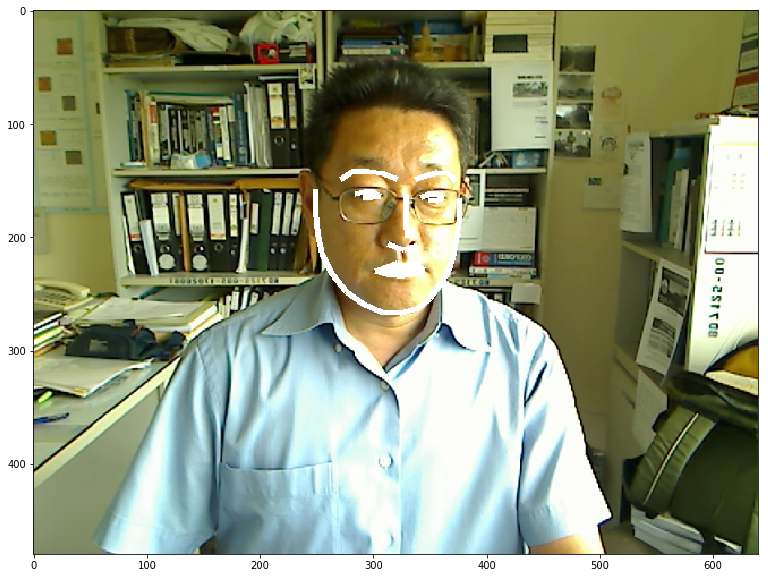

In [51]:
img_out = draw_landmark(frame)
plt.figure(figsize=(40,10))
plt.imshow(img_out)
plt.show()

## Developing positive filter
Start with masking of all zero and the we will use rule base condition on facial landmark to set pixel that is the facial human skin to 1

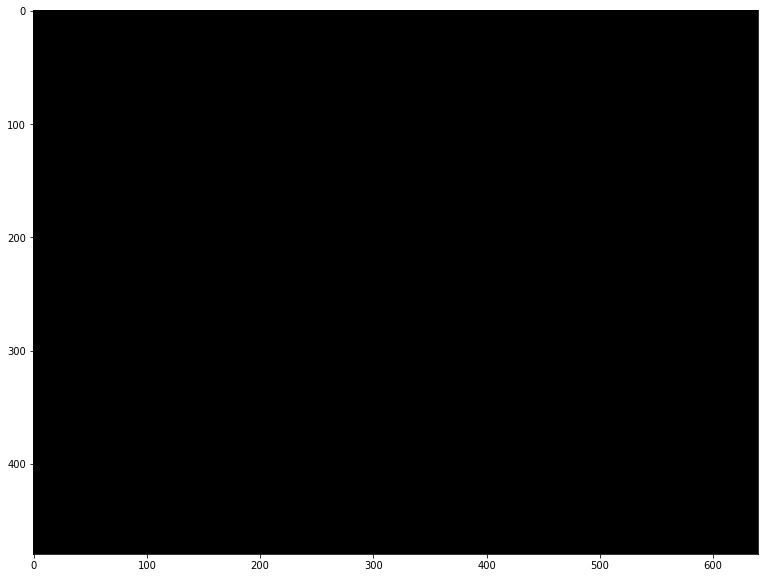

In [52]:
# create all zeroes masking
# print(frame.shape[0:2])
mask = np.zeros(frame.shape[0:2])
plt.figure(figsize=(40,10))
plt.imshow(mask,cmap='gray')
plt.show()

In [53]:
# here the part to develop the pipeline of the filer
rgb_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
face_landmarks_list = face_recognition.face_landmarks(rgb_img)
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# working with only the first face
face_landmarks = face_landmarks_list[0]  

I found 1 face(s) in this photograph.


In [54]:
print(face_landmarks.keys())

dict_keys(['bottom_lip', 'right_eyebrow', 'top_lip', 'nose_tip', 'nose_bridge', 'right_eye', 'left_eyebrow', 'chin', 'left_eye'])


In [55]:
print(face_landmarks['chin'])

[(249, 158), (249, 178), (251, 197), (255, 216), (264, 233), (276, 248), (291, 259), (307, 266), (324, 267), (339, 263), (350, 254), (359, 242), (367, 228), (371, 214), (374, 198), (376, 182), (376, 166)]


In [64]:
chin_pts = face_landmarks['chin']
print(len(chin_pts))

17


In [56]:
print(img_out[249,158])

[41 52 30]


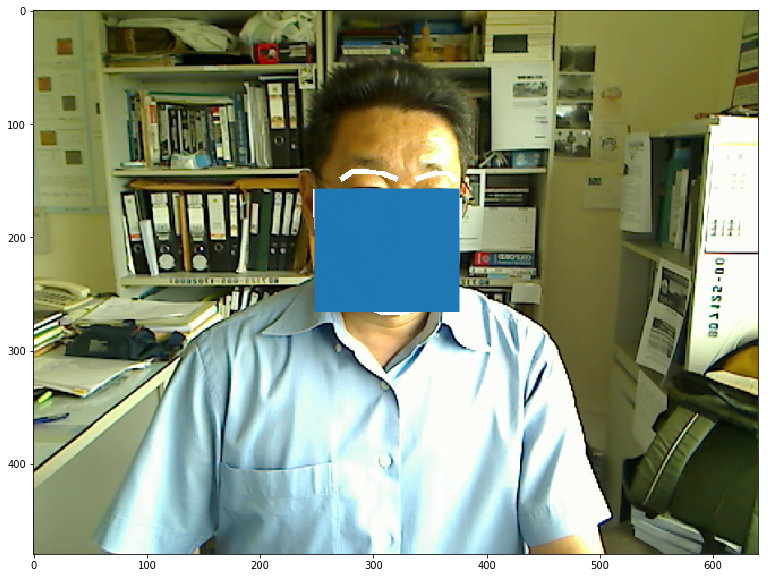

In [57]:
from matplotlib.patches import Circle
fig,ax = plt.subplots(1,figsize=(40,10))
ax.set_aspect('equal')
ax.imshow(img_out)
for index_x in range(249,376):
    for index_y in range(158,266):
        circ = Circle((index_x,index_y),1)
        ax.add_patch(circ)
plt.show()

In [ ]:
print()

In [45]:
#let's see rgb value of the first spot
pos = face_landmarks['chin']
for index_x in range(249,376):
    for index_y in range(158,266):
        cur_pixel = img_out[index_x,index_y,:]
        if(np.array_equal(cur_pixel,np.array([0,0,0]))):
            print("found white")
        else:
            mask[index_x,index_y] = 255
#         print("next line")
print('done')

done


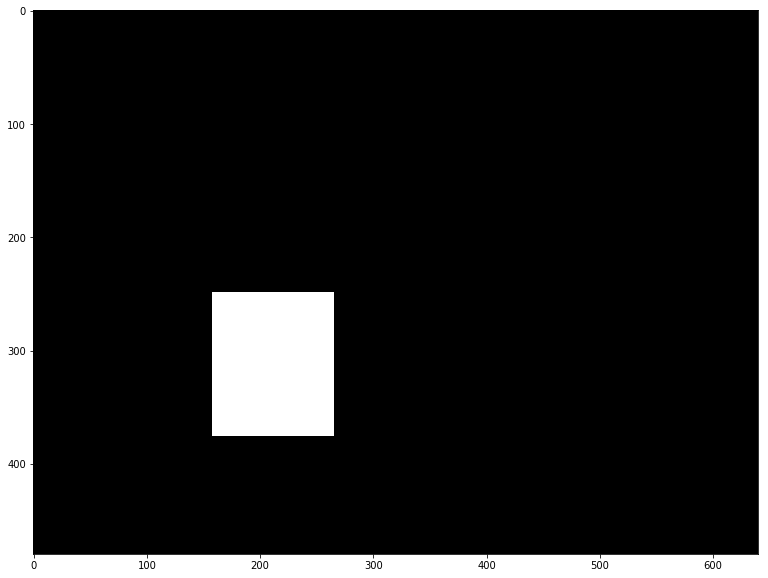

In [46]:
plt.figure(figsize=(40,10))
plt.imshow(mask,cmap='gray')
plt.show()

In [36]:
print(mask.shape)
print(img_out.shape)

(480, 640)
(480, 640, 3)


In [24]:
cur_pixel = img_out[249,158,:]
a = np.array([255,255,255])
print(cur_pixel.shape, a.shape)
print(np.array_equal(cur_pixel,cur_pixel))

(3,) (3,)
True


In [72]:
print(cur_pixel.sh)

250


In [53]:
a= img_out[249:376,160:182,:]==[255,255,255]
# print(img_out[249:376,160:182,:])
b = np.where(a)
print(b)

(array([  1,   2,   3,   4,   5,  13,  15,  15,  16,  16,  17,  19,  19,
        20,  20,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,
        22,  22,  22,  22,  23,  23,  23,  24,  24,  24,  24,  24,  25,
        25,  26,  55,  56,  56,  64,  65,  67,  68,  71,  72,  73,  74,
        75,  75,  76,  77,  77,  80,  85,  86,  88,  93,  94,  95,  95,
        96,  97,  98,  99,  99, 100, 100, 101, 102, 103, 104, 105, 106,
       106, 107, 107, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113,
       113, 114, 115, 116, 117, 118, 118, 119, 119, 120, 121, 122]), array([20, 20, 20, 20, 20,  0,  0,  1,  0,  1,  0,  4,  4,  3,  3,  4,  4,
        5,  5,  3,  4,  5,  6,  1,  1,  2,  3,  4,  5,  6,  1,  4,  5,  0,
        1,  2,  3,  4,  0,  1,  0, 21, 20, 21, 20, 20, 20, 20, 17, 17, 17,
       17, 17, 18, 17, 17, 20, 20, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 18, 20, 18, 20,  2,  2, 18,  2,
       18,  2, 18,  2,  3,  2,  3,  3,  3,  3,  3, 

In [48]:
from matplotlib.patches import Circle
dot_img = Circle(frame, (249,158),10)

TypeError: __init__() takes from 2 to 3 positional arguments but 4 were given

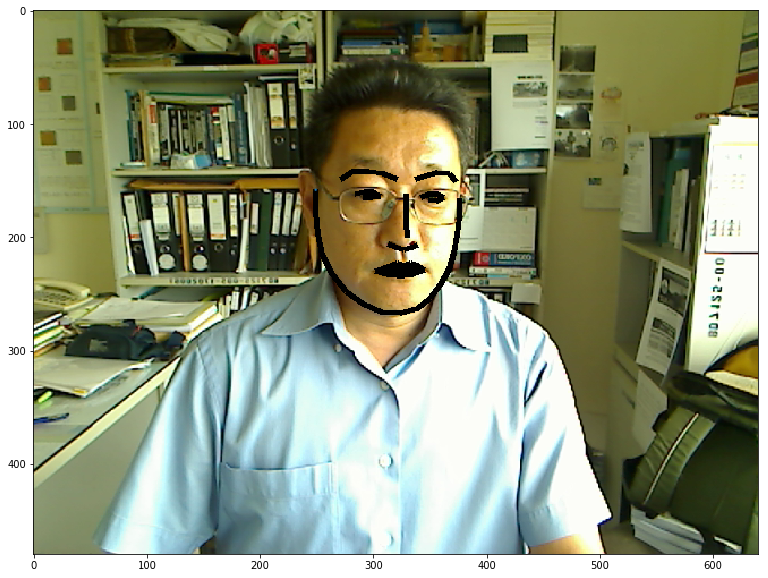

In [49]:
fig,ax = plt.subplots(1,figsize=(40,10))
ax.set_aspect('equal')
ax.imshow(img_out)
circ = Circle((249,158),1)
ax.add_patch(circ)
plt.show()